In [ ]:
"""
Explore textnets with tutorial example (newspaper, headlines)

"""

In [1]:
from textnets import Corpus, Textnet
from textnets import examples

In [2]:
import spacy
from spacy.lang.en.examples import sentences 
import en_core_web_sm
nlp = en_core_web_sm.load()

In [3]:
import pandas as pd

In [4]:
corpus = Corpus(examples.moon_landing)

In [5]:
type(examples.moon_landing)

pandas.core.series.Series

In [6]:
examples.moon_landing

The Guardian                         3:56 am: Man Steps On to the Moon
New York Times       Men Walk on Moon -- Astronauts Land on Plain, ...
Boston Globe                                         Man Walks on Moon
Houston Chronicle    Armstrong and Aldrich "Take One Small Step for...
Washington Post       The Eagle Has Landed -- Two Men Walk on the Moon
Chicago Tribune      Giant Leap for Mankind -- Armstrong Takes 1st ...
Los Angeles Times    Walk on Moon -- That's One Small Step for Man,...
Name: headlines, dtype: object

In [7]:
corpus

Corpus(7 docs: The Guardian, New York Times, Boston Globe…)

In [8]:
pd.DataFrame(examples.moon_landing)

,headlines
The Guardian,3:56 am: Man Steps On to the Moon
New York Times,"Men Walk on Moon -- Astronauts Land on Plain, ..."
Boston Globe,Man Walks on Moon
Houston Chronicle,"Armstrong and Aldrich ""Take One Small Step for..."
Washington Post,The Eagle Has Landed -- Two Men Walk on the Moon
Chicago Tribune,Giant Leap for Mankind -- Armstrong Takes 1st ...
Los Angeles Times,"Walk on Moon -- That's One Small Step for Man,..."


In [9]:
# Create textnet
tn = Textnet(corpus.tokenized(), min_docs=1)

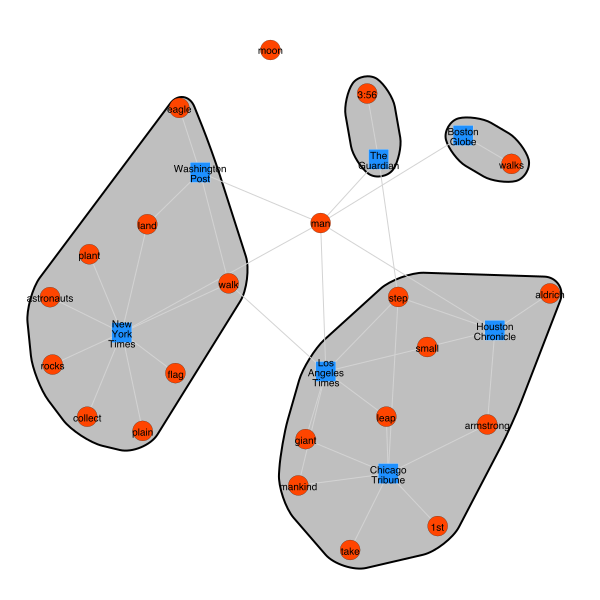

In [10]:
# Identifies document–term groups that appear to form part of the same theme in the texts.
tn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        show_clusters=True)

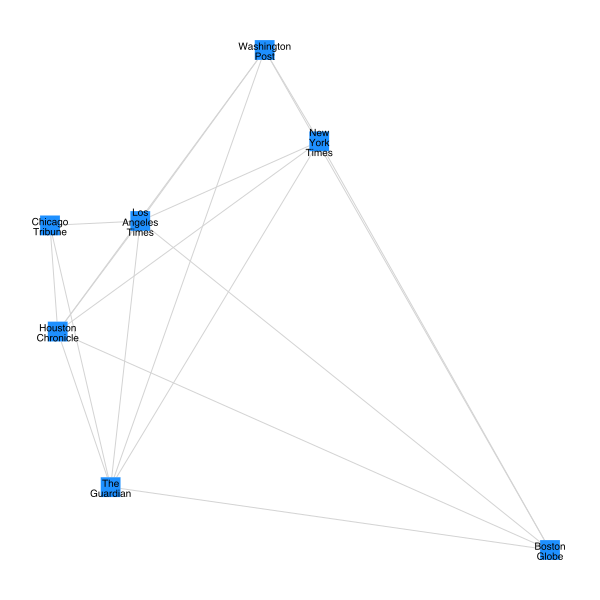

In [11]:
# Network of newspapers
papers = tn.project(node_type='doc')
papers.plot(label_nodes=True)

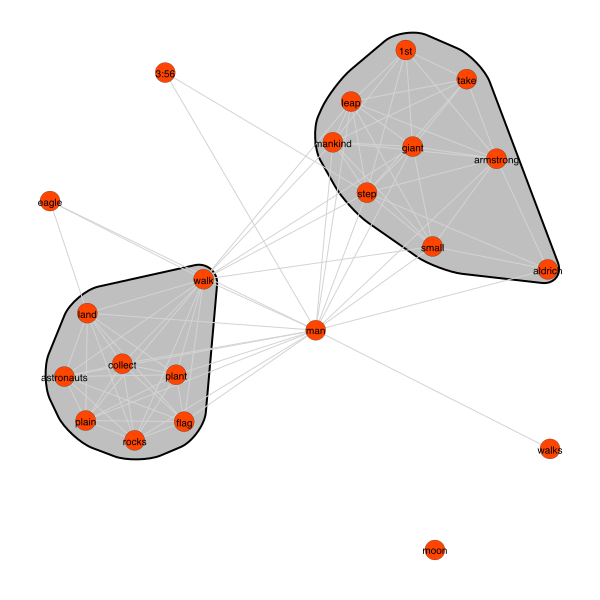

In [12]:
# Network of the words (terms)
words = tn.project(node_type='term')
words.plot(label_nodes=True,
           show_clusters=True)

In [13]:
# Between centrality of newspaper
# See that the Los Angeles Times is a cultural bridge
# linking the headline themes of the East Coast newspapers to the others!

papers.top_betweenness()

Los Angeles Times    7.0
Boston Globe         0.0
Chicago Tribune      0.0
Houston Chronicle    0.0
New York Times       0.0
The Guardian         0.0
Washington Post      0.0
dtype: float64

In [14]:
# Between centrality of terms
# the Times uses the word “walk” in its headline,
# linking the “One Small Step” cluster to the “Man on Moon” cluster.

words.top_betweenness()

walk         80.00
man          19.00
step         17.00
small        12.75
giant         9.75
leap          9.75
mankind       9.75
land          6.00
armstrong     5.00
plain         0.00
dtype: float64

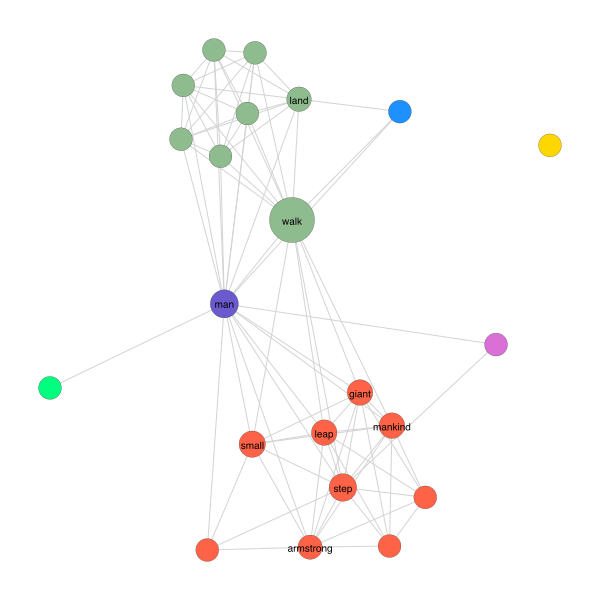

In [15]:
words.plot(label_nodes=True,
           scale_nodes_by='betweenness',
           color_clusters=True,
           node_label_filter=lambda n: n.betweenness() > words.betweenness.median())

## Try with our transcripts

In [22]:
# Let's read in our document-term matrix
speech_df = pd.read_pickle('../dump/speech_clean_lemma')
topic_df = pd.read_pickle('../dump/topic_df')
# data = pd.read_pickle('../dump/data_dtm_lemma.pkl')
# tdm = data.transpose()

In [17]:
speech_df

,speaker,year,transcript,length
0,SIDDHARTHA MUKHERJEE,2018,i wish someone have tell me at my own commence...,14487
1,ABBY WAMBACK,2018,failure be not something to be ashamed of its ...,15866
2,JON B. FISHER,2018,thank you very much my father commencement spe...,8544
3,MINDY KALING,2018,good morning to the class of the faculty the p...,15391
4,JESMYN WARD,2018,persist be patient be well good morning it be ...,14063
...,...,...,...,...
436,CARRIE CHAPMAN,1936,i bring a message to sweet briar college and e...,22942
437,FRANKLIN D ROOSEVELT,1932,for me as for you this be a day of honorable a...,16017
438,OPRAH WINFREY,1918,thank you wallis annenberg and a special thank...,15301
439,RALPH WALDO,1838,in this refulgent summer it have be a luxury t...,40403


In [18]:
df = pd.DataFrame(speech_df['transcript'])
df.index = speech_df.speaker.tolist()

In [19]:
df

,transcript
SIDDHARTHA MUKHERJEE,i wish someone have tell me at my own commence...
ABBY WAMBACK,failure be not something to be ashamed of its ...
JON B. FISHER,thank you very much my father commencement spe...
MINDY KALING,good morning to the class of the faculty the p...
JESMYN WARD,persist be patient be well good morning it be ...
...,...
CARRIE CHAPMAN,i bring a message to sweet briar college and e...
FRANKLIN D ROOSEVELT,for me as for you this be a day of honorable a...
OPRAH WINFREY,thank you wallis annenberg and a special thank...
RALPH WALDO,in this refulgent summer it have be a luxury t...


In [20]:
df.transcript

SIDDHARTHA MUKHERJEE    i wish someone have tell me at my own commence...
ABBY WAMBACK            failure be not something to be ashamed of its ...
JON B. FISHER           thank you very much my father commencement spe...
MINDY KALING            good morning to the class of the faculty the p...
JESMYN WARD             persist be patient be well good morning it be ...
                                              ...                        
CARRIE CHAPMAN          i bring a message to sweet briar college and e...
FRANKLIN D ROOSEVELT    for me as for you this be a day of honorable a...
OPRAH WINFREY           thank you wallis annenberg and a special thank...
RALPH WALDO             in this refulgent summer it have be a luxury t...
GARRISON KEILLOR        its an honor to be with so many smart people a...
Name: transcript, Length: 441, dtype: object

In [21]:
examples.moon_landing

The Guardian                         3:56 am: Man Steps On to the Moon
New York Times       Men Walk on Moon -- Astronauts Land on Plain, ...
Boston Globe                                         Man Walks on Moon
Houston Chronicle    Armstrong and Aldrich "Take One Small Step for...
Washington Post       The Eagle Has Landed -- Two Men Walk on the Moon
Chicago Tribune      Giant Leap for Mankind -- Armstrong Takes 1st ...
Los Angeles Times    Walk on Moon -- That's One Small Step for Man,...
Name: headlines, dtype: object

In [23]:
topic_df

,0,1,2,3,4,5,6,7,8,9
Topic #01,parent,year,dream,person,family,advice,moment,friends,place,home
Topic #02,parent,sense,idea,generation,word,place,year,country,friends,president
Topic #03,women,question,state,education,year,parent,university,course,company,dream
Topic #04,man,women,place,men,success,word,course,career,university,country


In [32]:
topic_df['words'] = topic_df.apply(lambda x: ' '.join(x),axis=1)

In [35]:
topic_word = topic_df[['words']]
topic_word.index = ['#01','#02','#03','#04']
topic_word

,words
#01,parent year dream person family advice moment ...
#02,parent sense idea generation word place year c...
#03,women question state education year parent uni...
#04,man women place men success word course career...


In [36]:
# Create corpus
corpus = Corpus(topic_word.words)

In [37]:
# Create textnet
tn = Textnet(corpus.tokenized(), min_docs=1)

In [39]:
tn

Textnet(4 docs, 26 terms, 39 edges)

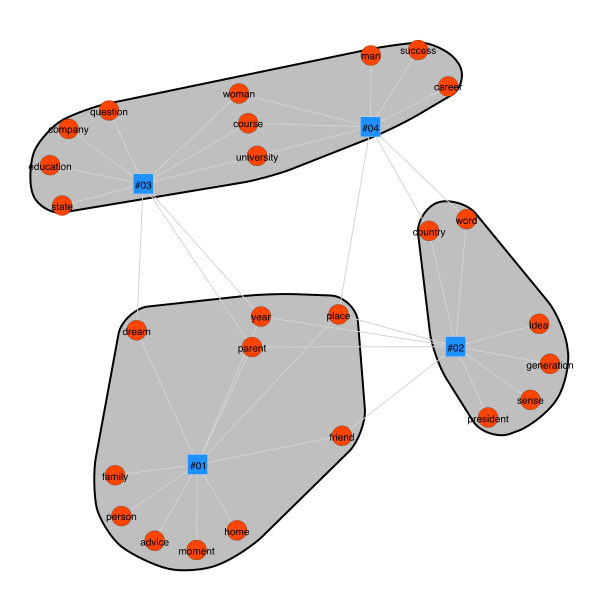

In [45]:
# Identifies document–term groups that appear to form part of the same theme in the texts.
tn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        show_clusters=True,
        color_clusters=False)